In [99]:
import numpy as np
import visa
import matplotlib.pyplot as plt
import time
    
class Generador():
    def __init__(self,ID):
        self.obj_visa=rm.open_resource(ID)
        self.ID = ID
         
    def setFrequency(self,freq):
        self.obj_visa.write("SOURce1:FREQuency:FIXed "+str(freq))
        
    def setAmplitude(self,amp):
        self.obj_visa.write("SOURce1:VOLTage:LEVel:IMMediate:AMPLitude "+str(amp))
        
    def setWaveform(self,waveform ='Senoidal'):
        switcher = {'Senoidal':"SIN",'Cuadrada':"SQU",'Pulso':"PULS"}
        self.obj_visa.write("SOURce1:FUNCtion "+switcher.get(waveform,'Senoidal'))  

        
class Osciloscopio():

    def __init__(self,ID):
        self.obj_visa=rm.open_resource(ID)
        self.ID = ID
        self.parameters = None
        
    def setBaseTime(self,scale):
        self.obj_visa.write('HORizontal:MAIN:SCALe '+str(scale))
       # self.obj_visa.write('HORizontal:DELay:SCALe {}'.format(scale))
 
    def capturaPantalla(self):
        if self.parameters is None:
            YOFF_in_dl = float(self.obj_visa.query("WFMP:YOFF?"))
            YZERO_in_YUNits = float(self.obj_visa.query("WFMP:YZERO?"))
            YMUlt = float(self.obj_visa.query("WFMP:YMULT?"))
            self.parameters = (YOFF_in_dl,YZERO_in_YUNits,YMUlt)
        (YOFF_in_dl , YZERO_in_YUNits , YMUlt) = self.parameters
        curve_in_dl = np.array(self.obj_visa.query_binary_values('CURV?', datatype='b', is_big_endian=True))
        valores = ((curve_in_dl - YOFF_in_dl)*YMUlt)+YZERO_in_YUNits
        intervalo = float(osci.obj_visa.query('WFMPre:XINcr?'))
        tiempos = np.arange(len(valores))*intervalo
        return tiempos, valores

In [104]:
def sweepe(generador, osciloscopio, init_freq = 100, end_freq = 10100, cant_med = 100):
    paso = np.floor(np.divide(end_freq - init_freq,cant_med))
    values = np.zeros(cant_med)
    freqs = np.add(np.multiply(np.arange(cant_med), paso), init_freq)
    for i,freq in enumerate(freqs):
        periodo = np.divide(1,freq)
        osciloscopio.setBaseTime(0.1*periodo*4)
        # Escribir Generador
        generador.setFrequency(freq)
        # Esperamos a que se setee y lea bien
        time.sleep(1)
        # Consulta Osciloscopio
        osci.obj_visa.write('MEASUrement:IMMed:TYPE PK2pk')
        values[i] = float(osci.obj_visa.query('MEASUREMENT:IMMed:VALue?'))
    return freqs, values

In [92]:
rm = visa.ResourceManager()
ID=rm.list_resources()
genf = Generador(ID[0])
osci = Osciloscopio(ID[1])

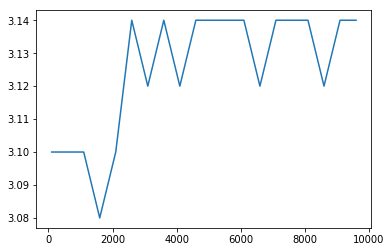

In [105]:
frecuencias, valores = sweepe(genf, osci, cant_med = 20)
plt.plot(frecuencias,valores)
plt.show()

In [97]:
frecuencias

array([  100.,   600.,  1100.,  1600.,  2100.,  2600.,  3100.,  3600.,
        4100.,  4600.,  5100.,  5600.,  6100.,  6600.,  7100.,  7600.,
        8100.,  8600.,  9100.,  9600.])

In [15]:
paso = np.floor(np.divide(end_freq - init_freq,cant_med))
values = np.zeros(cant_med)
freqs = np.add(np.multiply(np.arange(cant_med), paso), init_freq)

In [24]:
osci.obj_visa.write('MEASUrement:IMMed:TYPE PK2pk')
float(osci.obj_visa.query('MEASUREMENT:IMMed:VALue?'))

3.1199998856

In [95]:
valor_escala = 0.00001
osci.setBaseTime(valor_escala)
str(valor_escala)

'1e-05'

In [90]:
osci.obj_visa.write('HOR:MAIN:SCA 1.0E-6')

(21, <StatusCode.success: 0>)